# **Detectron2 & TFOD2 - Assignment**

**Question 1: What is Detectron2 and how does it differ from previous object detection frameworks?**

Detectron2 is an open-source computer vision framework developed by Facebook AI Research (FAIR) for object detection, segmentation, and other visual tasks.

It differs from previous frameworks primarily by being built on PyTorch and featuring a more modular, flexible design, and faster performance.

**Question 2: Explain the process and importance of data annotation when working with Detectron2.**

Data annotation in Detectron2 involves labeling custom images (using tools like CVAT or Roboflow) to define bounding boxes or segmentation masks, which are then exported into the COCO JSON format to map class IDs to object locations.

This process requires registering the dataset within Detectron2, ensuring high-quality, consistent labels that allow the model to learn specific features, such as shapes or categories, beyond standard pre-trained datasets.

The importance of this step cannot be overstated; accurate annotations are essential for achieving high precision in object detection, as they serve as the ground truth that enables supervised learning. Proper annotation directly impacts model performance, reduces training time, and ensures the model can correctly identify, classify, and segment target objects in new, unannotated images.

**Question 3: Describe the steps involved in training a custom object detection model using Detectron2.**

To train a custom object detection model using Detectron2, the general steps involve preparing a custom dataset in a compatible format (like COCO), configuring the necessary data loaders and evaluation metrics, setting up a model configuration file (often starting from a pre-trained model checkpoint), initializing a DefaultTrainer instance, and finally, calling the train method.

This process leverages Detectron2's high-level API to automate much of the standard training loop, data augmentation, and logging.

**Question 4: What are evaluation curves in Detectron2, and how are metrics like mAP and IoU interpreted?**

In Detectron2, evaluation curves primarily refer to Precision-Recall (PR) curves, which help visualize a model's trade-off between precision and recall at various confidence thresholds.

The performance is summarized using key metrics like mAP (mean Average Precision) and IoU (Intersection over Union), which quantify the accuracy of object localization and classification.

**Question 5: Compare Detectron2 and TFOD2 in terms of features, performance, and ease of use.**

Detectron2 (PyTorch, Meta AI) excels in flexibility, advanced tasks (panoptic/instance segmentation, keypoint detection) with a modular design but has a steeper learning curve and high GPU needs, while TFOD2 (TensorFlow, Google) offers broader ecosystem integration, simpler integration into Google Cloud, often easier entry for beginners, and strong production readiness, though potentially less cutting-edge on pure research models, both providing high performance depending on model choice, with TFOD2 potentially having better market adoption.

**Question 6: Write Python code to install Detectron2 and verify the installation.**

In [7]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

  Using cached PyYAML-5.1.tar.gz (274 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
fatal: destination path 'detectron2' already exists and is not an empty directory.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment


In [8]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

/bin/bash: line 1: nvcc: command not found
torch:  2.9 ; cuda:  cpu
detectron2: 0.6


In [9]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

**Question 7: Annotate a dataset using any tool of your choice and convert the annotations to COCO format for Detectron2.**

In [1]:
!pip install roboflow

In [2]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

  Using cached PyYAML-5.1.tar.gz (274 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
fatal: destination path 'detectron2' already exists and is not an empty directory.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment


In [3]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

/bin/bash: line 1: nvcc: command not found
torch:  2.9 ; cuda:  cpu
detectron2: 0.6


In [5]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from roboflow import Roboflow
rf = Roboflow(api_key="OW0NGyO0XjTOUAZ7RAiE")
project = rf.workspace("roboflow-universe-projects").project("fire-and-smoke-segmentation")
version = project.version(6)
dataset = version.download("coco-segmentation")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fire-and-Smoke-Segmentation-6 in coco-segmentation:: 100%|██████████| 7118/7118 [00:06<00:00, 1151.68it/s]


In [7]:
%cd /content/Fire-and-Smoke-Segmentation-6
!cat /content/Fire-and-Smoke-Segmentation-6/test/_annotations.coco.json

/content/Fire-and-Smoke-Segmentation-6
{"info":{"year":"2025","version":"6","description":"Exported from roboflow.com","contributor":"","url":"https://public.roboflow.com/object-detection/undefined","date_created":"2025-04-11T08:34:26+00:00"},"licenses":[{"id":1,"url":"https://creativecommons.org/licenses/by/4.0/","name":"CC BY 4.0"}],"categories":[{"id":0,"name":"fire-smoke","supercategory":"none"},{"id":1,"name":"fire","supercategory":"fire-smoke"},{"id":2,"name":"smoke","supercategory":"fire-smoke"}],"images":[{"id":0,"license":1,"file_name":"flare_0074_jpg.rf.aa3d148ea4d6689f69e05e44cbb15ca5.jpg","height":640,"width":640,"date_captured":"2025-04-11T08:34:26+00:00","extra":{"user_tags":["cloned-universe","fire-smoke","polygon-labels"],"name":"flare_0074.jpg"}},{"id":1,"license":1,"file_name":"flare_0199_jpg.rf.ae500cc8937e810f0a400aec85299764.jpg","height":640,"width":640,"date_captured":"2025-04-11T08:34:26+00:00","extra":{"user_tags":["cloned-universe","fire-smoke","polygon-labels

WARNING [01/17 08:34:47 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/17 08:34:47 d2.data.datasets.coco]: Loaded 7050 images in COCO format from /content/Fire-and-Smoke-Segmentation-6/train/_annotations.coco.json


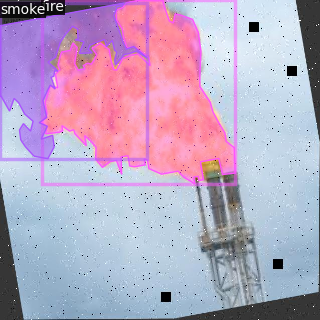

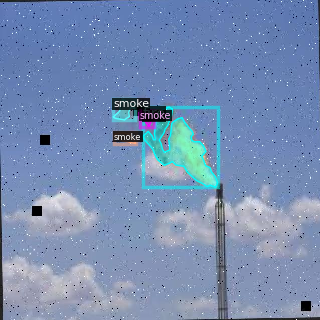

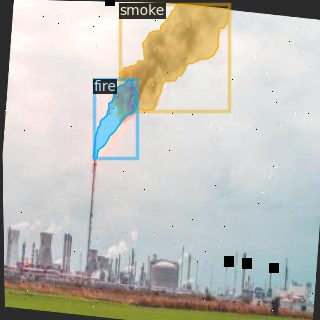

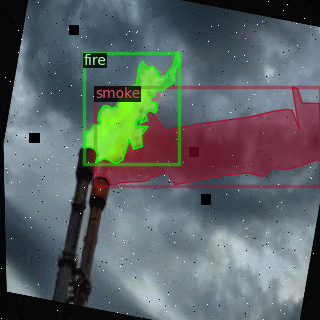

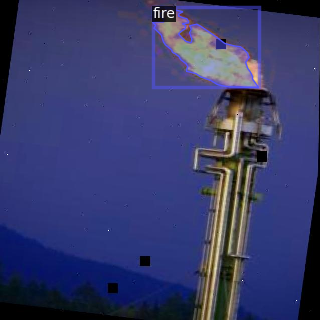

In [9]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("exp_train", {}, "/content/Fire-and-Smoke-Segmentation-6/train/_annotations.coco.json", "/content/Fire-and-Smoke-Segmentation-6/train")
register_coco_instances("exp_val", {}, "/content/Fire-and-Smoke-Segmentation-6/valid/_annotations.coco.json", "/content/Fire-and-Smoke-Segmentation-6/valid")
register_coco_instances("exp_test", {}, "/content/Fire-and-Smoke-Segmentation-6/test/_annotations.coco.json", "/content/Fire-and-Smoke-Segmentation-6/test")

#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("exp_train")
dataset_dicts = DatasetCatalog.get("exp_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 5):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

**Question 8: Write a script to download pretrained weights and configure paths for training in Detectron2.**

In [11]:
import os
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo

def setup_detectron2_training_config(config_file_path, pretrained_weights_url, output_dir="./output_train"):
    """
    Sets up the Detectron2 configuration for training using pretrained weights.

    Args:
        config_file_path (str): The path to the base YAML configuration file in the model zoo.
        pretrained_weights_url (str): The URL or shortcut for the pretrained model weights.
        output_dir (str): The directory where training outputs (checkpoints, logs) will be saved.

    Returns:
        cfg (CfgNode): The configured Detectron2 configuration object.
    """
    # 1. Get a fresh configuration
    cfg = get_cfg()

    # 2. Merge with a pre-trained model's configuration from the model zoo
    # This automatically sets many defaults, including the model architecture
    cfg.merge_from_file(model_zoo.get_config_file(config_file_path))

    # 3. Set the pre-trained weights
    # Detectron2 will download these weights automatically if not already cached
    cfg.MODEL.WEIGHTS = pretrained_weights_url

    # 4. Configure paths for training
    # Set the output directory for logs and saved model checkpoints
    cfg.OUTPUT_DIR = output_dir
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True) # Create the output directory if it doesn't exist

    # 5. Customize other training parameters (example values for fine-tuning)
    # Note: Adjust these based on your specific dataset and hardware (e.g., GPU VRAM)
    cfg.DATASETS.TRAIN = ("your_custom_dataset_train",) # Register your custom training dataset name(s) here
    cfg.DATASETS.TEST = ("your_custom_dataset_val",)   # Register your custom validation dataset name(s) here
    cfg.DATALOADER.NUM_WORKERS = 2                     # Number of data loading threads
    cfg.SOLVER.IMS_PER_BATCH = 2                       # Batch size (adjust based on GPU memory)
    cfg.SOLVER.BASE_LR = 0.00025                       # Initial learning rate for fine-tuning
    cfg.SOLVER.MAX_ITER = 300                          # Maximum number of iterations for training
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128     # Number of regions of interest per image
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1                # Number of classes in your custom dataset (e.g., 1 for "balloon")

    return cfg

# Example usage in a training script:
if __name__ == "__main__":
    # Define model details from the Detectron2 Model Zoo
    # The URL shortcut 'detectron2://...' is preferred for automatic downloading
    CONFIG_FILE = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
    WEIGHTS_URL = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
    OUTPUT_FOLDER = "./custom_train_output"

    # Configure the model
    cfg = setup_detectron2_training_config(CONFIG_FILE, WEIGHTS_URL, OUTPUT_FOLDER)

    print(f"Configuration setup complete. Weights path: {cfg.MODEL.WEIGHTS}")
    print(f"Output directory: {cfg.OUTPUT_DIR}")
    print("To start training, you would typically register your custom datasets first (see cfg.DATASETS.TRAIN), then use DefaultTrainer(cfg).train().")

    # Example of how to use the config to start training (requires registered datasets)
    # trainer = DefaultTrainer(cfg)
    # trainer.resume_or_load(resume=False)
    # trainer.train()

Configuration setup complete. Weights path: detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl
Output directory: ./custom_train_output
To start training, you would typically register your custom datasets first (see cfg.DATASETS.TRAIN), then use DefaultTrainer(cfg).train().


**Question 9: Show the steps and code to run inference using a trained Detectron2 model on a new image.**

[01/17 08:36:20 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
W0117 08:36:28.749000 23255 torch/fx/_symbolic_trace.py:52] is_fx_tracing will return true for both fx.symbolic_trace and torch.export. Please use is_fx_tracing_symbolic_tracing() for specifically fx.symbolic_trace or torch.compiler.is_compiling() for specifically torch.export/compile.


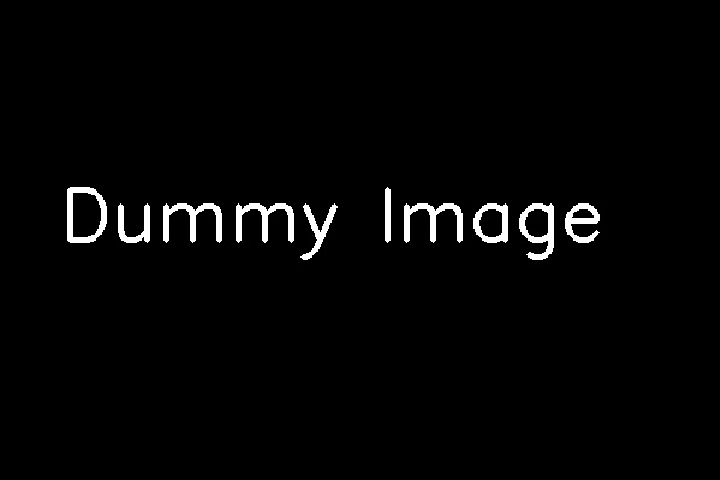

In [12]:
import cv2
import os
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# 1. Setup configuration
cfg = get_cfg()
# Use the same config file used during training
CONFIG_FILE = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
cfg.merge_from_file(model_zoo.get_config_file(CONFIG_FILE))

# 2. Load pre-trained weights and set threshold
# For demonstration, use pre-trained weights from the model zoo
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(CONFIG_FILE)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # Set threshold for this model
cfg.MODEL.DEVICE = "cpu"  # Use "cpu" if no GPU is available

# 3. Initialize predictor
predictor = DefaultPredictor(cfg)

# 4. Load image and run inference
# Create a dummy image for demonstration if 'new_image.jpg' does not exist
if not os.path.exists("./new_image.jpg"):
    dummy_image = np.zeros((400, 600, 3), dtype=np.uint8)
    cv2.putText(dummy_image, "Dummy Image", (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)
    cv2.imwrite("./new_image.jpg", dummy_image)

im = cv2.imread("./new_image.jpg")
outputs = predictor(im)

# 5. Visualize and display
# For visualization without a custom dataset, use a generic COCO metadata
v = Visualizer(im[:, :, ::-1], metadata=MetadataCatalog.get("coco_2017_val"), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])
# cv2.waitKey(0) # Not needed with cv2_imshow

**Question 10: You are assigned to build a wildlife monitoring system to detect and track different animal species in a forest using Detectron2. Describe the end-to-end pipeline from data collection to deploying the model, and how you would handle challenges like occlusion or nighttime detection.**

To build a wildlife monitoring system with Detectron2, the pipeline begins with collecting diverse image data from camera traps, followed by labeling with tools like CVAT to create COCO-format annotations.

The training phase involves selecting a pre-trained backbone (e.g., ResNet-50 or Swin Transformer) from the Detectron2 Model Zoo and fine-tuning it on the forest dataset. For deployment, the model is exported to TorchScript or ONNX for optimized inference on edge devices like NVIDIA Jetson.

To handle occlusion, use heavy data augmentation (Random Erasing or Crop) and temporal consistency (tracking across frames). For nighttime detection, incorporate infrared-specific training data and apply image enhancement techniques like CLAHE to improve contrast in low-light conditions.